# **BDTs at work: the $\Omega$ analysis**

The goal of this tutorial is to provide an example of binary classification with machine learning techniques applied to an ALICE analysis. This tutorial is based on the measurement of the invariant mass of the $\mathrm{\Omega}$ , through its cascade decay channel $\mathrm{\Omega^-} \rightarrow \mathrm{\Lambda} + K^- \rightarrow p + \pi^- + K^-$. We will need two samples: 
- Real data: Pb--Pb collisions at $s_{\sqrt{NN}} = 5.02$ TeV (LHC18qr, subsample)
- Anchored MC production: LHC21l5

At the end of the tutorial we will be able to see the peak of the $\mathrm{\Omega}$ !


<img src="img/omega_dec.png" 
     align="center" 
     width="500" />

#### First, we need some libraries ###

In [1]:
### standard sci-py libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import uproot ### to read, convert, inspect ROOT TTrees


One tip before starting: to access the documentation associated to each function we are going to call just type Shift+Tab after the first parenthesis of the function

## Reading trees with uproot, handling them with pandas

Uproot (https://github.com/scikit-hep/uproot4) is a Python package that provides tools for reading/writing ROOT files using Python and Numpy (does not depend on ROOT) and is primarly intended to stream data into machine learning libraries in Python.

In [2]:
## first we have to download the trees

#!curl -L https://cernbox.cern.ch/s/V05rgkoJfGe8x7K/download --output AnalysisResults-mc_reduced.root
#!curl -L https://cernbox.cern.ch/s/ReP4m9tDJ6UfivD/download --output AnalysisResults_reduced.root

In [2]:
import uproot
import pandas as pd  # Import the pandas library

# Rest of your code remains unchanged
mc_file = uproot.open("/home/oem/repos/data/AnalysisResults_reduced.root")

# Load the data from the "XiOmegaTree" TTree using NumPy arrays
numpy_mc = mc_file["XiOmegaTree"].arrays(library="np")
print(numpy_mc)


{'pt': array([2.95665407, 2.3375349 , 3.49518967, ..., 2.26300001, 2.51613331,
       1.20448875]), 'eta': array([-0.24762242,  0.51199478,  0.4818711 , ...,  0.30498117,
       -0.46781945,  0.53567749]), 'mass': array([1.6849823 , 1.68114889, 1.66029489, ..., 1.68542159, 1.65778661,
       1.66609097]), 'ct': array([1.38192141, 3.43563914, 1.15997505, ..., 6.18283606, 1.56888652,
       6.38890219]), 'radius': array([2.67890625, 4.9609375 , 2.08359375, ..., 7.44140625, 1.7859375 ,
       4.7625    ]), 'radiusV0': array([21.6296875 , 15.18046875, 25.4       , ..., 11.80703125,
       16.76796875, 10.31875   ]), 'dcaBachPV': array([0.22820313, 1.29976563, 0.14882813, ..., 0.18851562, 0.13890625,
       0.1984375 ]), 'dcaV0PV': array([0.15875   , 0.32742188, 0.73421875, ..., 1.83554688, 0.50601562,
       1.666875  ]), 'dcaV0piPV': array([2.54      , 2.54      , 2.54      , ..., 1.01203125, 0.86320312,
       2.54      ]), 'dcaV0prPV': array([0.8334375 , 1.24023438, 2.31179688, ..., 2.4

In [3]:
# Convert the NumPy arrays to a pandas DataFrame
AnalysisResults_reduced = pd.DataFrame(numpy_mc)
AnalysisResults_reduced

# Write the DataFrame to a CSV file
#df.to_csv("AnalysisResults-mc_reduced.csv", index=False)

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,bachBarCosPA,tpcClBach,tpcClV0Pr,tpcClV0Pi,centrality,matter,hasTOFhit,hasITSrefit,isOmega,index
0,2.956654,-0.247622,1.684982,1.381921,2.678906,21.629687,0.228203,0.158750,2.540000,0.833438,...,0.99990,122,89,116,0,True,True,True,True,0.001531
1,2.337535,0.511995,1.681149,3.435639,4.960938,15.180469,1.299766,0.327422,2.540000,1.240234,...,0.99992,129,107,94,5,False,False,False,True,0.001256
2,3.495190,0.481871,1.660295,1.159975,2.083594,25.400000,0.148828,0.734219,2.540000,2.311797,...,0.99990,131,144,125,9,True,True,False,True,0.001586
3,3.431005,-0.031064,1.655359,2.049352,4.464844,25.400000,0.585391,0.148828,2.540000,2.004219,...,0.99990,98,135,116,0,False,True,True,True,0.001742
4,1.702399,-0.580567,1.667960,1.677295,1.389062,5.258594,0.476250,0.525859,1.121172,0.982266,...,0.99990,133,151,143,6,True,False,True,True,0.001197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3487477,1.577199,-0.472576,1.666047,2.535713,2.182812,25.400000,1.270000,0.476250,2.540000,2.540000,...,0.99990,111,142,124,0,True,False,False,True,0.001785
3487478,1.419298,-0.171253,1.649283,4.228776,3.075781,6.151562,0.932656,1.041797,2.540000,1.299766,...,0.99990,94,150,101,68,False,False,False,True,0.001681
3487479,2.263000,0.304981,1.685422,6.182836,7.441406,11.807031,0.188516,1.835547,1.012031,2.401094,...,0.99990,135,145,121,4,False,True,False,True,0.000393
3487480,2.516133,-0.467819,1.657787,1.568887,1.785937,16.767969,0.138906,0.506016,0.863203,0.506016,...,0.99990,94,120,131,4,False,True,False,True,0.001261


In [5]:
AnalysisResults_reduced.columns

Index(['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
       'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
       'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
       'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA', 'tpcClBach',
       'tpcClV0Pr', 'tpcClV0Pi', 'centrality', 'matter', 'hasTOFhit',
       'hasITSrefit', 'isOmega', 'index'],
      dtype='object')

# file  2


In [4]:
mc_file2 = uproot.open("/home/oem/repos/data/AnalysisResults-mc_reduced.root")
mc_file2.keys()

# Load the data from the "XiOmegaTree" TTree using NumPy arrays
numpy_mc2 = mc_file2["XiOmegaTree"].arrays(library="np")

# Print the data
print(numpy_mc2)


{'pt': array([3.43627572, 3.1503036 , 3.1503036 , ..., 0.98587209, 3.5488987 ,
       3.5488987 ]), 'eta': array([ 0.4304224 , -0.44923487, -0.44923487, ..., -0.21326731,
       -0.68127084, -0.68127084]), 'mass': array([1.35017145, 1.30052471, 1.30052471, ..., 1.29829669, 1.32010543,
       1.32010543]), 'ct': array([12.46815395,  0.97671664,  0.97671664, ...,  3.49920106,
       12.49555588, 12.49555588]), 'radius': array([25.4       ,  2.1828125 ,  2.1828125 , ...,  2.48046875,
        7.04453125,  7.04453125]), 'radiusV0': array([25.4      , 25.4      , 25.4      , ...,  4.365625 ,  7.7390625,
        7.7390625]), 'dcaBachPV': array([2.54      , 0.2778125 , 0.2778125 , ..., 0.62507813, 2.54      ,
       2.54      ]), 'dcaV0PV': array([0.46632812, 0.3175    , 0.3175    , ..., 0.873125  , 0.52585938,
       0.52585938]), 'dcaV0piPV': array([2.54, 2.54, 2.54, ..., 2.54, 2.54, 2.54]), 'dcaV0prPV': array([1.27992188, 2.19273438, 2.19273438, ..., 0.22820313, 0.29765625,
       0.2976562

In [7]:
# Convert the NumPy arrays to a pandas DataFrame
AnalysisResultsmc_reduced = pd.DataFrame(numpy_mc2)
AnalysisResultsmc_reduced
# Write the DataFrame to a CSV file
#AnalysisResults_mc_reduced.to_csv("AnalysisResults-mc_reduced.csv", index=False)

In [59]:
AnalysisResultsmc_reduced

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,3.436276,0.430422,1.350171,12.468154,25.400000,25.400000,2.540000,0.466328,2.540000,1.279922,...,False,False,2.961429,-0.176302,3.144315,-0.153703,0,True,1,0.030335
1,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.763839,0.372077,15.831111,0.300148,3312,False,1,0.062918
2,3.150304,-0.449235,1.300525,0.976717,2.182812,25.400000,0.277813,0.317500,2.540000,2.192734,...,True,False,1.712730,0.320456,4.392962,0.255281,-3312,False,1,0.099576
3,3.435864,-0.003711,1.308485,9.783530,25.400000,25.400000,0.823516,0.138906,2.540000,1.746250,...,True,False,4.034199,0.025677,0.990564,0.023720,0,True,1,0.083175
4,4.258953,0.133779,1.292546,2.277862,6.945312,15.676562,0.744141,0.109141,2.242344,0.654844,...,True,True,2.095031,-0.311874,6.342230,-0.264955,3312,False,1,0.082320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.755957,0.698097,1.321181,1.375398,3.274219,8.235156,0.357187,0.148828,1.289844,0.138906,...,True,False,0.862210,0.656377,2.048951,0.317477,3334,False,1,0.021034
96,2.755957,0.698097,1.321181,1.375398,3.274219,8.235156,0.357187,0.148828,1.289844,0.138906,...,True,False,3.520830,0.435706,12.635215,0.395723,-3334,False,1,0.052427
97,4.015166,-0.396483,1.320632,1.904451,6.151562,25.400000,1.061641,0.188516,2.540000,0.942578,...,True,False,3.998882,-0.395844,1.951803,-0.376763,-3312,True,1,0.071579
98,5.100792,-0.275525,1.322779,1.500977,1.885156,10.120312,0.327422,0.089297,1.855391,0.248047,...,True,False,2.408445,-0.373495,2.103387,-0.329122,-3312,False,1,0.053468


In [13]:
AnalysisResultsmc_reduced.columns

Index(['pt', 'eta', 'mass', 'ct', 'radius', 'radiusV0', 'dcaBachPV', 'dcaV0PV',
       'dcaV0piPV', 'dcaV0prPV', 'dcaV0tracks', 'dcaBachV0', 'cosPA',
       'cosPAV0', 'V0invMassDelta', 'tpcNsigmaBach', 'tpcNsigmaV0Pr',
       'tpcNsigmaV0Pi', 'competingMass', 'bachBarCosPA', 'tpcClBach',
       'tpcClV0Pr', 'tpcClV0Pi', 'centrality', 'matter', 'hasTOFhit',
       'hasITSrefit', 'isOmega', 'ptMC', 'etaMC', 'ctMC', 'yMC', 'pdg',
       'isReconstructed', 'flag', 'index'],
      dtype='object')

# ABOUT THE DATA 



**1. pt (Transverse Momentum):** The transverse momentum, represented by the column "pt," encapsulates the momentum component perpendicular to the direction of motion of particles within a particle collision. In the context of our analysis, it's akin to the sideways force exerted on an object as it moves forward. Just as a car may experience a lateral push while traveling along a straight path, particles exhibit transverse momentum as they navigate through space within the collision environment. This momentum component is essential for understanding the trajectories and interactions of particles, contributing valuable insights into their behavior and properties during the collision process.

**2. eta (Pseudorapidity):** Pseudorapidity, denoted by the column "eta," serves as a measure of the angle of a particle's trajectory relative to the beam axis within a particle collider. It provides crucial information about the distribution of particles across different regions of the detector. Think of pseudorapidity as analogous to the inclination angle of an object on a slope. Just as the steepness of a hill affects the trajectory of a rolling ball, pseudorapidity influences the distribution of particles within the detector, impacting their observable characteristics and interactions during collision events.

**3. mass (Mass):** The mass column represents the amount of matter contained within particles participating in collision events. Similar to the weight of an object, mass indicates the intrinsic property defining the particle's resistance to changes in motion. In our analysis, mass serves as a fundamental parameter for characterizing particle properties and interactions. Much like how the weight of an object determines its behavior under gravitational forces, particle mass influences their trajectories, decay patterns, and interactions within the collision environment, offering valuable insights into their underlying properties and behavior.

**4. ct (Decay Length):** Decay length, as indicated by the "ct" column, measures the distance traveled by particles before undergoing decay processes. It's akin to the distance covered by a thrown object before hitting the ground. Within the context of particle physics, decay length provides essential information about the stability and lifetime of particles, influencing their observable signatures and detection probabilities within the experimental setup. Understanding decay lengths enables researchers to infer crucial details about particle lifetimes, decay modes, and underlying interaction mechanisms, contributing to our comprehension of fundamental particle properties and behavior.

**5. radius (Radius):** The radius column denotes the distance from the center to the edge of a particle's trajectory within the detector. Similar to the radius of a circle, it characterizes the size and spatial extent of particle trajectories observed during collision events. Understanding particle radii provides insights into their spatial distribution and interaction patterns within the detector environment. Much like how the radius of a circular object defines its size and boundary, particle radii delineate the spatial boundaries of particle trajectories, aiding in the identification and classification of particles based on their observable signatures.

**6. radiusV0 (Radius V0):** RadiusV0 signifies the radius of a specific region of interest within the particle collision environment. Analogous to the radius of a target area within a larger space, it delineates a distinct region within the detector where specific particle interactions or decay processes are of interest. By focusing on the radiusV0 region, researchers can zoom in on specific particle interactions or phenomena, enabling targeted analysis and investigation of underlying processes. This localized perspective offers valuable insights into the dynamics and characteristics of particles within the designated region, enhancing our understanding of particle interactions and properties within the broader collision environment.

**7. dcaBachPV (Distance of Closest Approach to Bachelor Particle Primary Vertex):** The dcaBachPV column represents the closest distance between a particle track and the primary vertex associated with the bachelor particle. It's analogous to the minimum separation between two entities within the particle collision environment. This parameter provides essential information about the spatial relationships between particles and primary vertices, offering insights into particle trajectories and interaction patterns. Similar to how the distance between two points defines their spatial proximity, dcaBachPV quantifies the proximity between particle tracks and primary vertices, aiding in the characterization and classification of particle interactions within the detector.

**8. dcaV0PV (Distance of Closest Approach to V0 Particle Primary Vertex):** DcaV0PV measures the closest distance between a particle track and the primary vertex associated with the V0 particle. It's akin to the shortest distance between a particle's trajectory and a reference point within the collision environment. This parameter provides crucial information about the spatial relationship between particles and primary vertices, enabling researchers to infer valuable insights into particle trajectories and interaction dynamics. Much like how the distance between two points defines their spatial relationship, dcaV0PV quantifies the proximity between particle tracks and V0 particle primary vertices, facilitating the analysis and interpretation of particle interactions within the experimental setup.

**9. dcaV0piPV (Distance of Closest Approach to V0 Pion Primary Vertex):** The dcaV0piPV column denotes the closest distance between a particle track and the primary vertex associated with the V0 pion. It's similar to the minimum separation between two points within the particle collision environment. This parameter provides essential information about the spatial relationships between particles and primary vertices, offering insights into particle trajectories and interaction patterns. Much like how the distance between two points defines their spatial proximity, dcaV0piPV quantifies the proximity between particle tracks and primary vertices, aiding in the characterization and classification of particle interactions within the detector.

**10. dcaV0prPV (Distance of Closest Approach to V0 Proton Primary Vertex):** DcaV0prPV measures the closest distance between a particle track and the primary vertex associated with the V0 proton. It's similar to the shortest distance between a particle's trajectory and a reference point within the collision environment. This parameter provides crucial information about the spatial relationship between particles and primary vertices, enabling researchers to infer valuable insights into particle trajectories and interaction dynamics. Much like how the distance between two points defines their spatial relationship, dcaV0prPV quantifies the proximity between particle tracks and V0 particle primary vertices, facilitating the analysis and interpretation of particle interactions within the experimental setup.

# Data Cleaning and Preprocessing:  

## SIMULATED DATA 

### 1. MISSING VALUES 

The message "No missing values found in the DataFrame" indicates that after examining each column in the DataFrame `AnalysisResultsmc_reduced`, no missing values were detected. This suggests that all data entries in the DataFrame have been properly populated, with no null or NaN values present. It implies that the dataset is complete and ready for analysis without the need for additional data imputation or cleaning steps.

In [41]:
# Check for missing values in each column
missing_values = AnalysisResultsmc_reduced.isna().sum()

# Display the columns with missing values, if any
columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("Columns with missing values:")
    print(columns_with_missing_values)
else:
    print("No missing values found in the DataFrame.")


No missing values found in the DataFrame.


### 2. outliers, and inconsistencies.

               pt         eta        mass          ct      radius    radiusV0  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     2.922326    0.068704    1.408104    4.418305    6.851055   19.164102   
std      1.281827    0.404289    0.156568    5.059471    7.070483    7.693551   
min      0.594853   -0.761292    1.292472    0.518035    0.793750    4.067969   
25%      2.025057   -0.197906    1.312897    1.461288    2.480469   10.120312   
50%      2.799248    0.100456    1.322779    2.981133    4.167187   24.903906   
75%      3.476272    0.432362    1.426704    5.083856    7.863086   25.400000   
max      6.682316    0.768885    1.701161   24.975908   25.400000   25.400000   

        dcaBachPV     dcaV0PV   dcaV0piPV   dcaV0prPV  ...   tpcClV0Pr  \
count  100.000000  100.000000  100.000000  100.000000  ...  100.000000   
mean     1.004689    0.609302    1.894979    0.986830  ...  110.730000   
std      0.873998    0.681509    0.825968    0.7

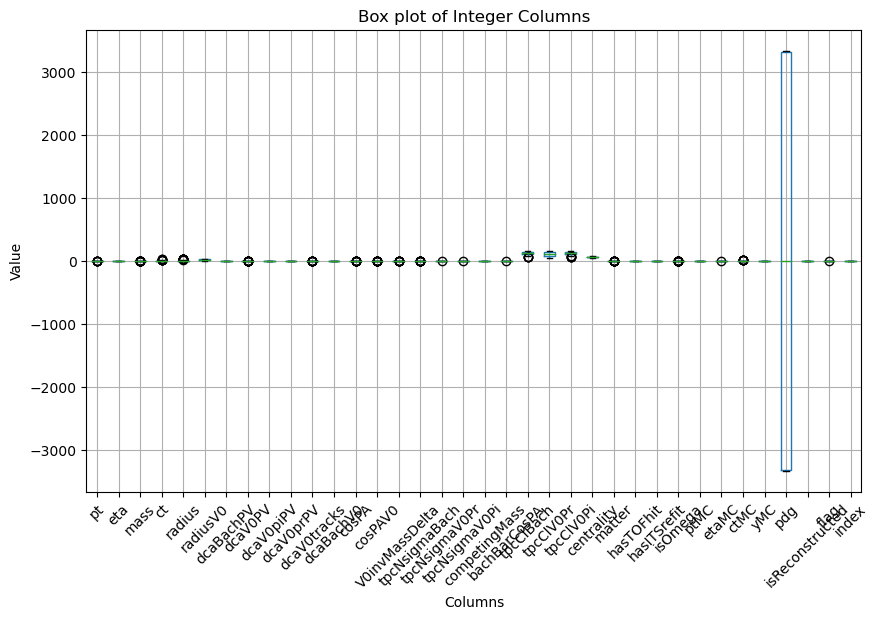

In [47]:
# Filter columns with integer values
integer_columns = AnalysisResultsmc_reduced.select_dtypes(exclude='object').columns

# Create a new DataFrame with only integer columns
AnalysisResultsmc_reduced_integer = AnalysisResultsmc_reduced[integer_columns]

# Descriptive statistics
integer_describe = AnalysisResultsmc_reduced_integer.describe()
print(integer_describe)

# Box plot for each integer column
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
AnalysisResultsmc_reduced_integer.boxplot()
plt.title('Box plot of Integer Columns')
plt.ylabel('Value')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


In [52]:
# Filter columns with integer values
integer_columns = AnalysisResultsmc_reduced.select_dtypes(exclude='object').columns

# Create a new DataFrame with only integer columns
AnalysisResultsmc_reduced_integer = AnalysisResultsmc_reduced[integer_columns]

from scipy.stats import zscore

# Calculate z-score for each value in integer columns
z_scores = AnalysisResultsmc_reduced_integer.apply(zscore)

# Define threshold for outlier detection
threshold = 3

# Find outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Display outliers
print("Outliers:")
print(outliers)


Outliers:
       pt    eta   mass     ct  radius  radiusV0  dcaBachPV  dcaV0PV  \
0   False  False  False  False   False     False      False    False   
1   False  False  False  False   False     False      False    False   
2   False  False  False  False   False     False      False    False   
3   False  False  False  False   False     False      False    False   
4   False  False  False  False   False     False      False    False   
..    ...    ...    ...    ...     ...       ...        ...      ...   
95  False  False  False  False   False     False      False    False   
96  False  False  False  False   False     False      False    False   
97  False  False  False  False   False     False      False    False   
98  False  False  False  False   False     False      False    False   
99  False  False  False  False   False     False      False    False   

    dcaV0piPV  dcaV0prPV  ...  hasITSrefit  isOmega   ptMC  etaMC   ctMC  \
0       False      False  ...        False    Fal

In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the data
standardized_data = scaler.fit_transform(AnalysisResultsmc_reduced)
# Assuming standardized_data is the standardized array and AnalysisResultsmc_reduced is the DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=AnalysisResultsmc_reduced.columns)

standardized_df

,pt,eta,mass,ct,radius,radiusV0,dcaBachPV,dcaV0PV,dcaV0piPV,dcaV0prPV,...,hasITSrefit,isOmega,ptMC,etaMC,ctMC,yMC,pdg,isReconstructed,flag,index
0,0.402971,0.899210,-0.371877,1.599061,2.636650,0.814619,1.765503,-0.210847,0.784862,0.392929,...,-1.491914,-0.546536,0.429037,-0.366822,0.002106,-0.522061,-0.078215,1.644294,-0.100504,-0.756630
1,0.178750,-1.287566,-0.690568,-0.683654,-0.663570,0.814619,-0.835859,-0.430328,0.784862,1.616674,...,0.670280,-0.546536,-0.517182,0.712818,3.983577,0.846887,1.032821,-0.608164,-0.100504,0.366114
2,0.178750,-1.287566,-0.690568,-0.683654,-0.663570,0.814619,-0.835859,-0.430328,0.784862,1.616674,...,0.670280,-0.546536,-0.557563,0.611187,0.393966,0.711557,-1.189252,-0.608164,-0.100504,1.629315
3,0.402648,-0.180019,-0.639467,1.065774,2.636650,0.814619,-0.208337,-0.693704,0.784862,1.018103,...,0.670280,-0.546536,1.276635,0.030831,-0.673802,0.013100,-0.078215,1.644294,-0.100504,1.064145
4,1.048004,0.161772,-0.741784,-0.425188,0.013398,-0.455590,-0.299613,-0.737600,0.422674,-0.445071,...,0.670280,1.829707,-0.255506,-0.633734,1.005701,-0.857629,1.032821,-0.608164,-0.100504,1.034677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.130444,1.564635,-0.557972,-0.604458,-0.508431,-1.427690,-0.744583,-0.679072,-0.736328,-1.136753,...,0.670280,-0.546536,-1.229561,1.272543,-0.341650,0.899157,1.040201,-0.608164,-0.100504,-1.077152
96,-0.130444,1.564635,-0.557972,-0.604458,-0.508431,-1.427690,-0.744583,-0.679072,-0.736328,-1.136753,...,0.670280,-0.546536,0.871021,0.838089,2.980615,1.135169,-1.196632,-0.608164,-0.100504,0.004620
97,0.856859,-1.156429,-0.561493,-0.499364,-0.099430,0.814619,0.065490,-0.620544,0.784862,-0.059325,...,0.670280,-0.546536,1.248731,-0.799055,-0.372138,-1.194874,-1.189252,1.644294,-0.100504,0.664573
98,1.708062,-0.855732,-0.547714,-0.579512,-0.705880,-1.181424,-0.778811,-0.766864,-0.048171,-0.990436,...,0.670280,-0.546536,-0.007878,-0.755053,-0.324567,-1.051176,-1.189252,-0.608164,-0.100504,0.040486
